**Univ.csv - It contains a number of variables for 739 different universities and colleges in the US**

### Read the Data 

In [1]:
path <- "./"
filename <- "Univ.csv"

In [2]:
# setting to current working directory
setwd(path)

In [3]:
# reading the csv file
S0 <- read.csv(filename)
head(S0, 5)

,University.name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Data Insights 

In [4]:
# summary of qualitative variables
summary(S0[,!names(S0) %in% c("University.name", "Private")])

      Apps             Accept            Enroll         Top10perc    
 Min.   :    0.0   Min.   :  -20.0   Min.   :  35.0   Min.   : 1.00  
 1st Qu.:  737.8   1st Qu.:  587.2   1st Qu.: 239.0   1st Qu.:15.00  
 Median : 1498.0   Median : 1108.0   Median : 435.5   Median :23.00  
 Mean   : 3031.3   Mean   : 2045.8   Mean   : 790.7   Mean   :27.43  
 3rd Qu.: 3753.5   3rd Qu.: 2534.2   3rd Qu.: 912.5   3rd Qu.:35.00  
 Max.   :48094.0   Max.   :26330.0   Max.   :6392.0   Max.   :96.00  
 NA's   :1         NA's   :1         NA's   :1        NA's   :3      
   Top25perc       F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.00   Min.   :   20   Min.   :    1.0   Min.   :    6  
 1st Qu.: 41.00   1st Qu.:  974   1st Qu.:   99.0   1st Qu.: 7257  
 Median : 54.00   Median : 1707   Median :  372.0   Median : 9900  
 Mean   : 55.79   Mean   : 3746   Mean   :  872.4   Mean   :10375  
 3rd Qu.: 69.00   3rd Qu.: 4265   3rd Qu.:  990.2   3rd Qu.:12860  
 Max.   :100.00   Max.   :31643 

In [5]:
# total number of missing values
count_na <- sum(is.na(S0))
print(paste("Total Number of missing values in the dataframe: ", count_na))

[1] "Total Number of missing values in the dataframe:  32"


In [6]:
# total number of missing values in each column
sapply(S0, function(col) sum(is.na(col)))

University.name         Private            Apps          Accept          Enroll 
              0               0               1               1               1 
      Top10perc       Top25perc     F.Undergrad     P.Undergrad        Outstate 
              3               0               2               1               3 
     Room.Board           Books        Personal             PhD        Terminal 
              2               1               2               4               2 
      S.F.Ratio     perc.alumni          Expend       Grad.Rate 
              1               2               4               2

In [7]:
# DF1 contains all quantitative columns
DF1 <- data.frame(S0[,!names(S0) %in% c("University.name", "Private")])
head(DF1, 5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
# replacing Na with column mean - using colMeans()
mean_value <- colMeans(DF1, na.rm = TRUE)
print(mean_value)

       Apps      Accept      Enroll   Top10perc   Top25perc F.Undergrad 
 3031.32656  2045.84824   790.68022    27.42663    55.78755  3746.10041 
P.Undergrad    Outstate  Room.Board       Books    Personal         PhD 
  872.37263 10375.24457  4360.20896   550.44986  1331.39620    73.19184 
   Terminal   S.F.Ratio perc.alumni      Expend   Grad.Rate 
   80.93894    14.05908    22.53053  9612.36190    65.39891 


In [9]:
# replacing NA with mean value of each column
for(col in colnames(DF1))
  DF1[,col][is.na(DF1[,col])] <- mean_value[col]

In [10]:
# column bind of S0 and DF1 (quantitative and Qualitative Variables)
DF1 <- cbind(S0[,names(S0) %in% c("University.name", "Private")], DF1)

In [11]:
# total number of missing values after imputing missing values with mean
count_na <- sum(is.na(DF1))
print(paste("Total Number of missing values in the dataframe: ", count_na))

[1] "Total Number of missing values in the dataframe:  0"


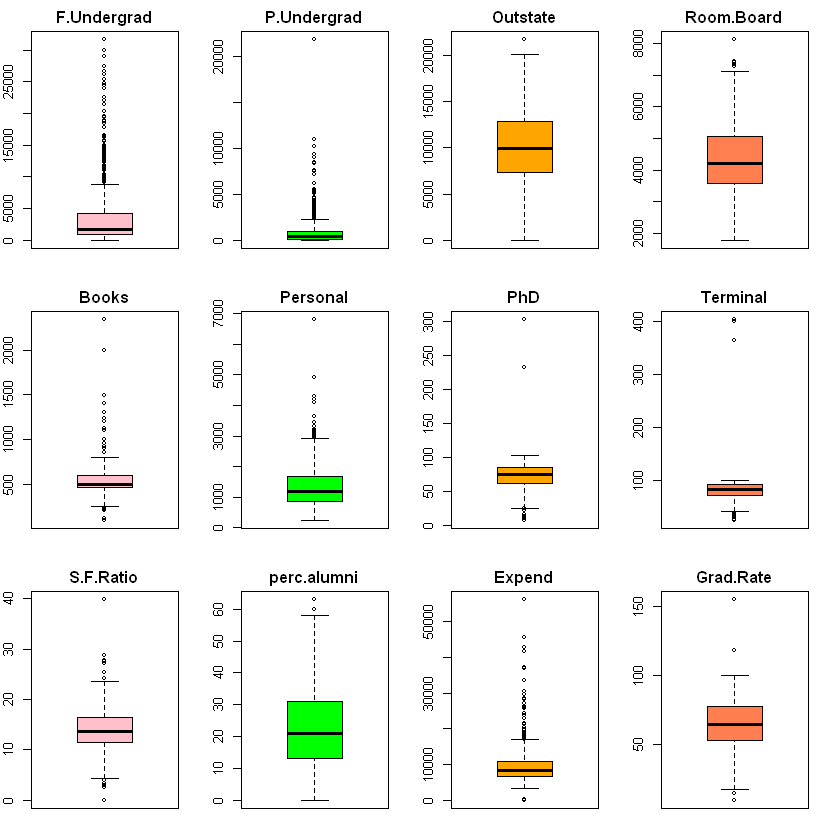

In [12]:
# considering last 12 columns of DF1 as 12 quantitative variables
twelve_quant_columns = tail(names(DF1), 12)
# creating a list with colors
plot_colors = list("pink", "green", "orange", "coral")
# repeating the colors by 3 times 
rep_plot_colors <- rep(plot_colors, times=3)
# layout of the plot is 3X4 matrix
par(mfrow=c(3, 4), mar=c(2,2,2,2))
# for each quantitative variables, plotting boxplot
for (cols in twelve_quant_columns){
  boxplot(DF1[[cols]], 
          main=cols,
          xlab=cols,
          ylab="",
          col=rep_plot_colors[[which(twelve_quant_columns==cols)]])
}

In [13]:
# summary statistics of the 12 quantitative variables
summary(DF1[twelve_quant_columns])

  F.Undergrad     P.Undergrad         Outstate       Room.Board  
 Min.   :   20   Min.   :    1.0   Min.   :    6   Min.   :1780  
 1st Qu.:  976   1st Qu.:   99.0   1st Qu.: 7290   1st Qu.:3588  
 Median : 1707   Median :  374.0   Median : 9900   Median :4200  
 Mean   : 3746   Mean   :  872.4   Mean   :10375   Mean   :4360  
 3rd Qu.: 4228   3rd Qu.:  987.5   3rd Qu.:12850   3rd Qu.:5050  
 Max.   :31643   Max.   :21836.0   Max.   :21700   Max.   :8124  
     Books           Personal         PhD            Terminal     
 Min.   :  96.0   Min.   : 250   Min.   :  8.00   Min.   : 24.00  
 1st Qu.: 458.5   1st Qu.: 850   1st Qu.: 62.00   1st Qu.: 70.50  
 Median : 500.0   Median :1200   Median : 75.00   Median : 82.00  
 Mean   : 550.4   Mean   :1331   Mean   : 73.19   Mean   : 80.94  
 3rd Qu.: 600.0   3rd Qu.:1678   3rd Qu.: 86.00   3rd Qu.: 92.00  
 Max.   :2340.0   Max.   :6800   Max.   :303.00   Max.   :404.00  
   S.F.Ratio      perc.alumni        Expend        Grad.Rate    
 Min

corrplot 0.92 loaded



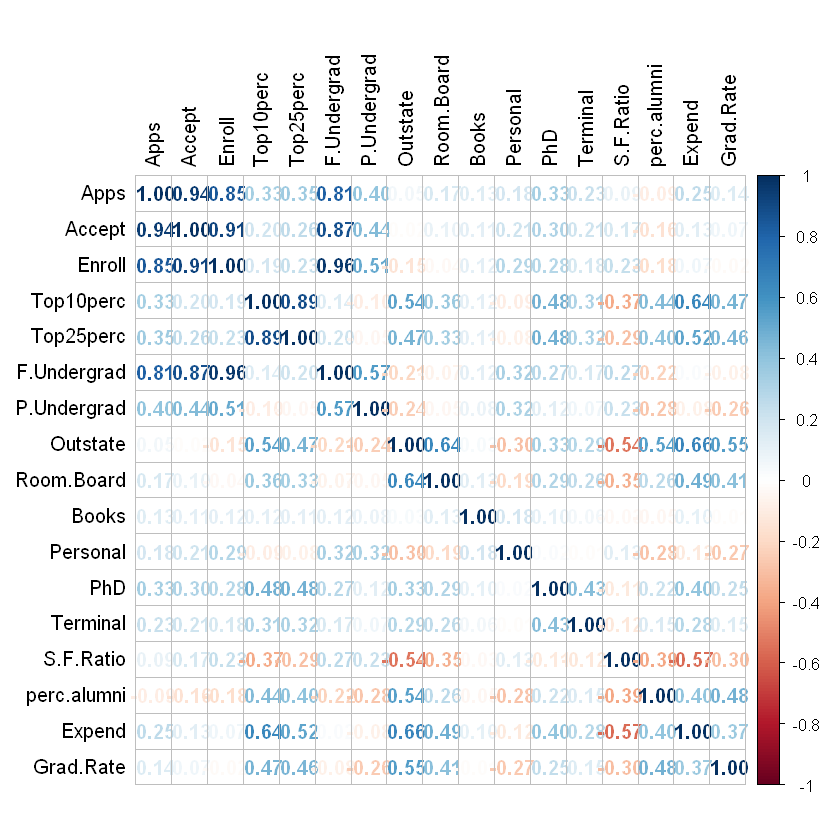

In [14]:
# correlation plot of all quantitative variables
library(corrplot)
corr_quants = cor(DF1[,!names(DF1) %in% c("University.name", "Private")])
corrplot(corr_quants, method = 'number', tl.col="black")

In [15]:
#patterns to search for Texas or TX
univ_patterns <- c('Texas', 'TX')
tx_univ <- DF1[grepl(univ_patterns, DF1$University.name),]
print(paste("Number of universities that have Texas or TX in its name: ", nrow(tx_univ)))

Warning message in grepl(univ_patterns, DF1$University.name):
"argument 'pattern' has length > 1 and only the first element will be used"


[1] "Number of universities that have Texas or TX in its name:  11"


In [16]:
# count occurences in the private column for "Texas" or "TX" universities
table(tx_univ['Private'])

Private
 No Yes 
  7   4 

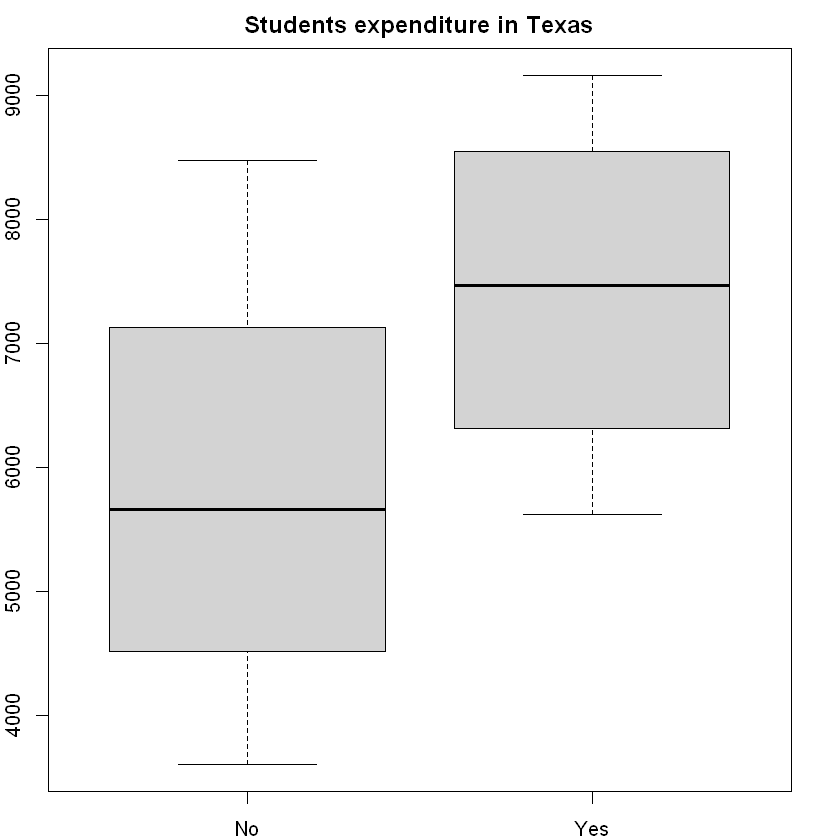

In [17]:
# boxplot comparing Private and Public universities of Texas
par(mar = c(2,2,2,2))
boxplot(Expend~Private, data=tx_univ, 
        main="Students expenditure in Texas", 
        xlab="Private university", ylab="Expenditure")

In [18]:
# summary statistics of public universities in Texas
summary(tx_univ[tx_univ$Private=="No",]$Expend)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3605    4512    5657    5859    7126    8471 

In [19]:
# summary statistics of private universities in Texas
summary(tx_univ[tx_univ$Private=="Yes",]$Expend)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5619    6656    7469    7429    8242    9158 

In [20]:
# average expenditure of public universities
public_avg = mean(tx_univ[tx_univ$Private=="No",]$Expend)
# average expenditure of private universities
private_avg = mean(tx_univ[tx_univ$Private=="Yes",]$Expend)
# comparision and percent calculation
if((public_avg*100) > (private_avg*100)){
  # public universities are expensive
  percent <- ((public_avg - private_avg)/public_avg)*100
  print(paste("Texas Public Universities are approximately more expensive than private universities by ", 
              paste(sprintf("%0.2f", round(percent, 2)), "%")))
}else {
  # private universities are expensive
  percent<-((private_avg - public_avg)/private_avg)*100
  print(paste("Texas Private Universities are approximately more expensive than public universities by ", 
              paste(sprintf("%0.2f", round(percent, 2)), "%")))
}

[1] "Texas Private Universities are approximately more expensive than public universities by  21.14 %"


### 5-Fold Cross Validation From Scratch

In [21]:
# splitting the dataset into train and test
F_Split <- function(df, P_train){
  set.seed(42)
  # random shuffle the data
  random_shuffle_data= df[sample(1:nrow(df)), ]
  # train set split ratio
  num_rows_train <- ceiling((P_train/100)*nrow(df))
  # test set split ratio
  num_rows_test <- nrow(df) - num_rows_train
  train = random_shuffle_data[1:num_rows_train,]
  test = random_shuffle_data[num_rows_train:nrow(df),]
  return(list(df_train=train, df_test=test))
}

In [22]:
# splitting the DF1 data
data_split <- F_Split(DF1, 80)
print(paste("Size of the Train Dataset = ", nrow(data_split$df_train)))
print(paste("Size of the Test Dataset = ", nrow(data_split$df_test)))

[1] "Size of the Train Dataset =  592"
[1] "Size of the Test Dataset =  148"


In [23]:
# 5 - Fold Cross Validation Custom Function
# considering the target column as "Private"
target_column <- "Private"
F_CV <- function(target_variable, num_folds, data, random_seed=400) {
  set.seed(random_seed)  # For reproducibility
  
  # randomly shuffling the data
  data <- data[sample(nrow(data)), ]
  
  # calculating the fold size
  size_of_each_fold <- floor(nrow(data) / num_folds)
  
  # vector to store the metric results for each fold
  metric_results <- numeric(num_folds)
  
  for (fold in 1:num_folds) {
    print(paste("Fold ", fold))
    # indices for the test set
    test_indices <- ((fold - 1) * size_of_each_fold):(fold * size_of_each_fold)
    
    # Splitting the data into train and test sets for each folds
    test_data <- data[test_indices, ]
    train_data <- data[-test_indices, ]
    
    # Training the model using the provided algorithm
    model  = glm(Private ~ ., data = train_data, family = binomial)
    # make predictions
    predictions <- predict(model, newdata = test_data)
    threshold <- 0.5
    predicted_classes <- ifelse(predictions >= threshold, 1, 0)
    true_classes = as.list(test_data$Private)
    
    # evaluate the predictions
    accuracy <- mean(predicted_classes == true_classes)  # Replace with your target variable name
    print(paste("Accuracy: ", paste(sprintf("%0.2f", round(accuracy*100, 2)), "%")))
    # Store the metric result for this fold
    metric_results[fold] <- accuracy
  }
  
  # Calculate the average metric result across all folds
  average_metric <- mean(metric_results)
  
  # Return both the average metric and the metric results for each fold
  return(list(average_metric = average_metric, metric_results = metric_results))
}

In [24]:
# Define the number of folds
num_folds <- 5
DF1$University.name <- NULL
DF1$Private <- ifelse(DF1$Private == "Yes", 1, 0)
# Create a function for 5-fold cross-validation

In [25]:
model_results = F_CV("Private", 5, DF1)

[1] "Fold  1"
[1] "Accuracy:  89.12 %"
[1] "Fold  2"
[1] "Accuracy:  90.54 %"
[1] "Fold  3"
[1] "Accuracy:  96.62 %"
[1] "Fold  4"
[1] "Accuracy:  93.24 %"
[1] "Fold  5"
[1] "Accuracy:  90.54 %"
